# Cluster


This notebook provides a comprehensive guide on implementing Cluster using scikit-learn libraries.

By: Bryce Li, NUS

In this example we compare the various initialization strategies for K-means in terms of runtime and quality of the results.

As the ground truth is known here, we also apply different cluster quality metrics to judge the goodness of fit of the cluster labels to the ground truth.

## Introduction
In this tutorial, you will learn about k-means clustering. We'll cover:

* How the k-means clustering algorithm works
* How to visualize data to determine if it is a good candidate for clustering
* A case study of training and tuning a k-means clustering model using a real-world California housing dataset. 


Note that this should not be confused with k-nearest neighbors, and readers wanting that should go to k-Nearest Neighbors (KNN) Classification with scikit-learn in Python instead.

This is useful to know as k-means clustering is a popular clustering algorithm that does a good job of grouping spherical data together into distinct groups. This is very valuable as both an analysis tool when the groupings of rows of data are unclear or as a feature-engineering step for improving supervised learning models. 

We expect a basic understanding of Python and the ability to work with pandas Dataframes for this tutorial.

## An Overview of K-Means Clustering

Clustering models aim to group data into distinct “clusters” or groups. This can both serve as an interesting view in an analysis, or can serve as a feature in a supervised learning algorithm. 

Consider a social setting where there are groups of people having discussions in different circles around a room. When you first look at the room, you just see a group of people. You could mentally start placing points in the center of each group of people and name that point as a unique identifier. You would then be able to refer to each group by a unique name to describe them. This is essentially what k-means clustering does with data. 

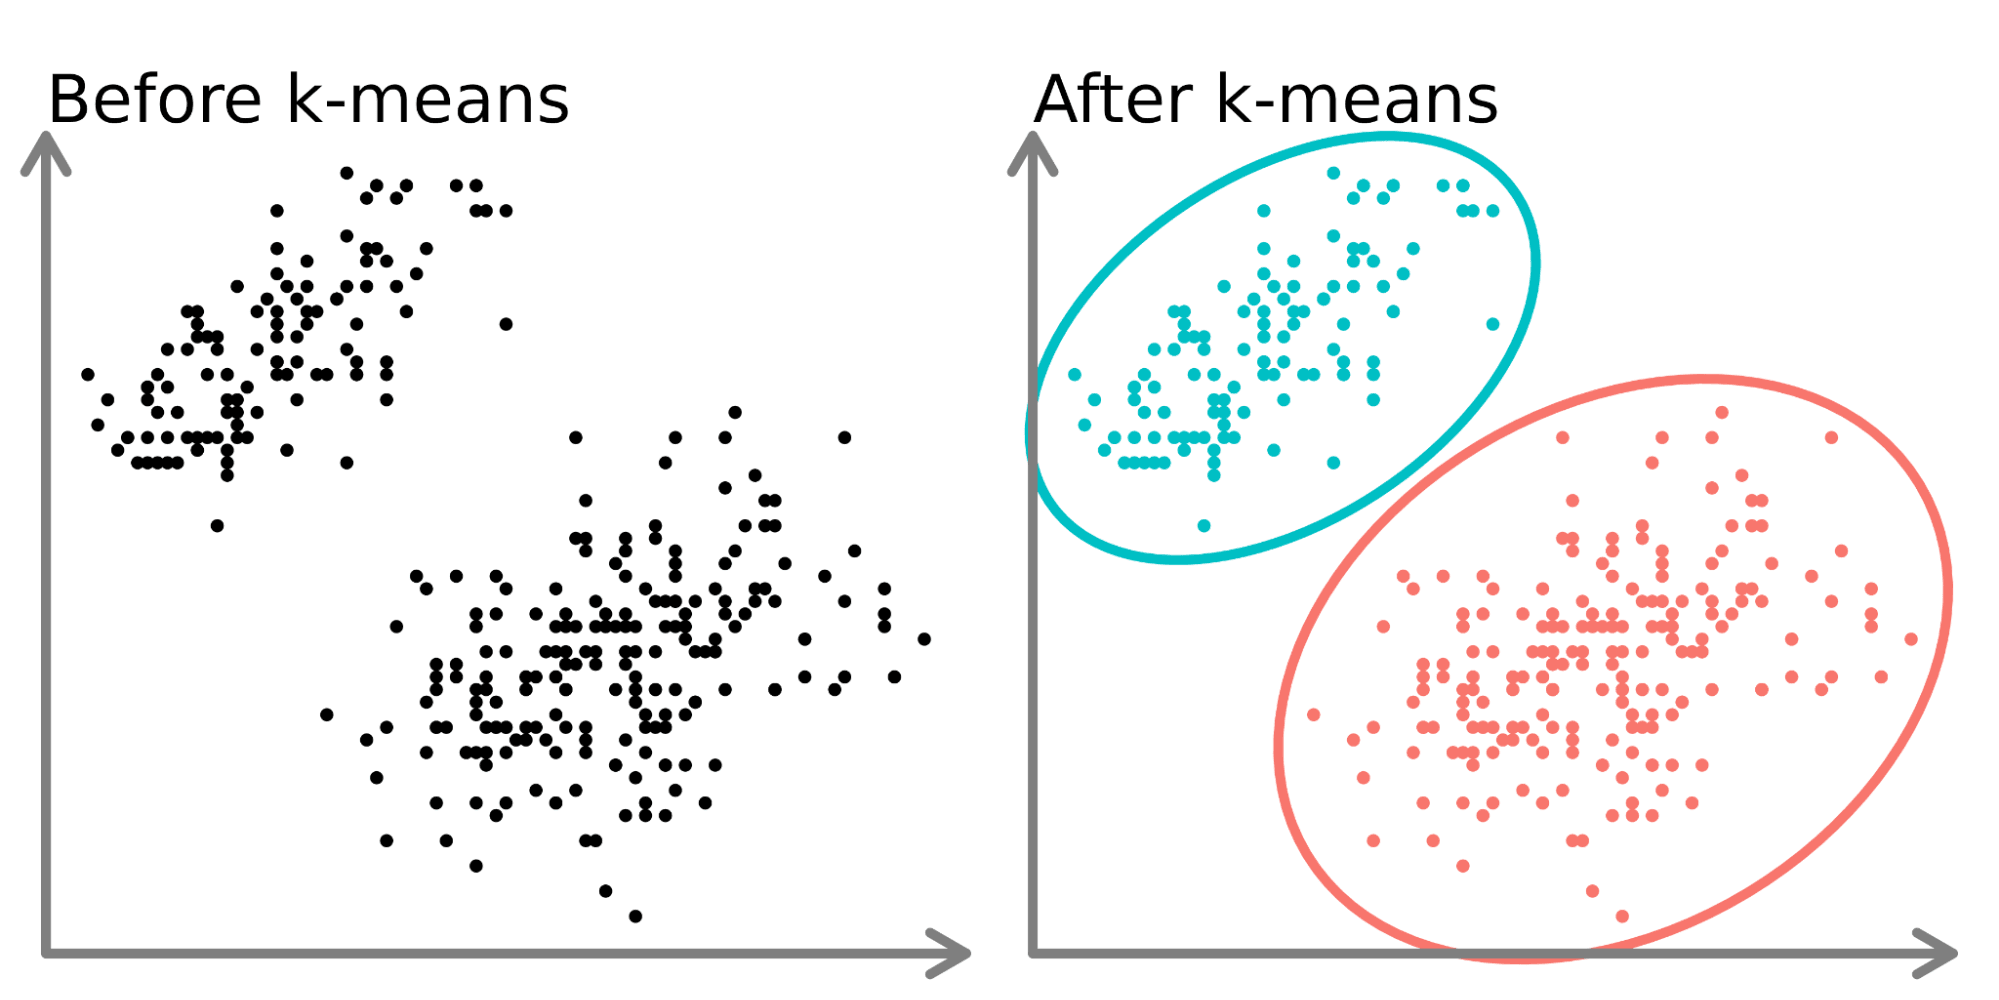

In the left-hand side of the diagram above, we can see 2 distinct sets of points that are unlabeled and colored as similar data points. Fitting a k-means model to this data (right-hand side) can reveal 2 distinct groups (shown in both distinct circles and colors). 

In two dimensions, it is easy for humans to split these clusters, but with more dimensions, you need to use a model.

## The Dataset
In this tutorial, we will be using California housing data from Kaggle. We will use location data (latitude and longitude) as well as the median house value. We will cluster the houses by location and observe how house prices fluctuate across California. We save the dataset as a csv file called ‘housing.csv’ in our working directory and read it using pandas.

In [1]:
import pandas as pd

home_data = pd.read_csv('housing.csv', usecols = ['longitude', 'latitude', 'median_house_value'])
home_data.head()

,longitude,latitude,median_house_value
0,-122.23,37.88,452600.0
1,-122.22,37.86,358500.0
2,-122.24,37.85,352100.0
3,-122.25,37.85,341300.0
4,-122.25,37.85,342200.0


The data include 3 variables that we have selected using the usecols parameter:

* longitude: A value representing how far west a house is. Higher values represent houses that are further West.
* latitude: A value representing how far north a house is. Higher values represent houses that are further north.
* median_house_value: The median house price within a block measured in USD

## Visualize the Data

We start by visualizing our housing data. We look at the location data with a heatmap based on the median price in a block. We will use Seaborn to quickly create plots in this tutorial.

<Axes: xlabel='longitude', ylabel='latitude'>

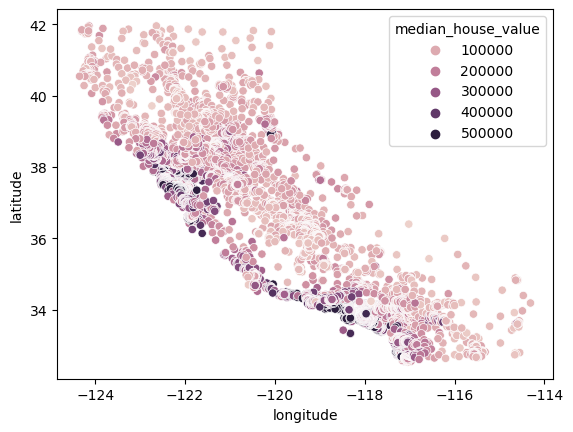

In [2]:
import seaborn as sns

sns.scatterplot(data = home_data, x = 'longitude', y = 'latitude', hue = 'median_house_value')

We see that most of the expensive houses are on the west coast of California with different areas that have clusters of moderately priced houses. This is expected as typically waterfront properties are worth more than houses that are not on the coast. 

Clusters are often easy to spot when you are only using 2 or 3 features.

## Normalizing the Data

When working with distance-based algorithms, like k-Means Clustering, we must normalize the data. If we do not normalize the data, variables with different scaling will be weighted differently in the distance formula that is being optimized during training. For example, if we were to include price in the cluster, in addition to latitude and longitude, price would have an outsized impact on the optimizations because its scale is significantly larger and wider than the bounded location variables. 

We first set up training and test splits using train_test_split from sklearn. 

In [3]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(home_data[['latitude', 'longitude']], home_data[['median_house_value']], test_size=0.33, random_state=0)

In [4]:
from sklearn import preprocessing

X_train_norm = preprocessing.normalize(X_train)
X_test_norm = preprocessing.normalize(X_test)

## Fitting and Evaluating the Model

For the first iteration, we will arbitrarily choose a number of clusters (referred to as k) of 3. Building and fitting models in sklearn is very simple. We will create an instance of KMeans, define the number of clusters using the n_clusters attribute, set n_init, which defines the number of iterations the algorithm will run with different centroid seeds, to “auto,” and we will set the random_state to 0 so we get the same result each time we run the code.  We can then fit the model to the normalized training data using the fit() method.

In [5]:
pd.isna(X_train_norm).sum()

0

In [6]:
import sklearn; sklearn.show_versions()


System:
    python: 3.8.19 (default, Mar 20 2024, 15:27:52)  [Clang 14.0.6 ]
executable: /Users/bryce/anaconda3/envs/DSML/bin/python
   machine: macOS-13.4.1-arm64-arm-64bit

Python dependencies:
      sklearn: 1.3.0
          pip: 24.0
   setuptools: 68.2.2
        numpy: 1.24.3
        scipy: 1.10.1
       Cython: None
       pandas: 2.0.3
   matplotlib: 3.7.2
       joblib: 1.2.0
threadpoolctl: 2.2.0

Built with OpenMP: True

threadpoolctl info:
       filepath: /Users/bryce/anaconda3/envs/DSML/lib/libopenblasp-r0.3.21.dylib
         prefix: libopenblas
       user_api: blas
   internal_api: openblas
        version: 0.3.21
    num_threads: 8
threading_layer: pthreads
   architecture: armv8

       filepath: /Users/bryce/anaconda3/envs/DSML/lib/libomp.dylib
         prefix: libomp
       user_api: openmp
   internal_api: openmp
        version: None
    num_threads: 8


In [7]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters = 3, random_state = 0, n_init='auto')
kmeans.fit(X_train_norm)

KMeans(n_clusters=3, n_init='auto', random_state=0)

Once the data are fit, we can access labels from the labels_ attribute. Below, we visualize the data we just fit. 

<Axes: xlabel='longitude', ylabel='latitude'>

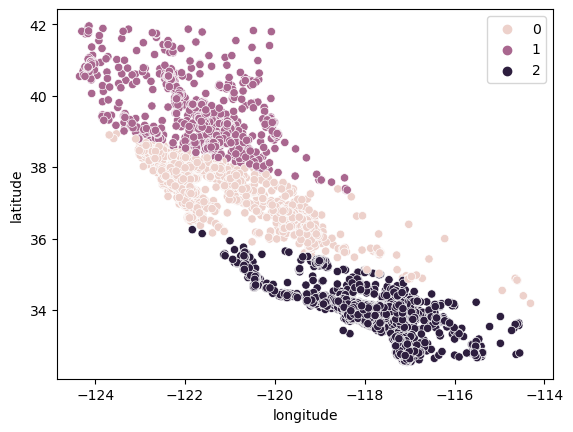

In [8]:
sns.scatterplot(data = X_train, x = 'longitude', y = 'latitude', hue = kmeans.labels_)

We see that the data are now clearly split into 3 distinct groups (Northern California, Central California, and Southern California). We can also look at the distribution of median house prices in these 3 groups using a boxplot. 

<Axes: ylabel='median_house_value'>

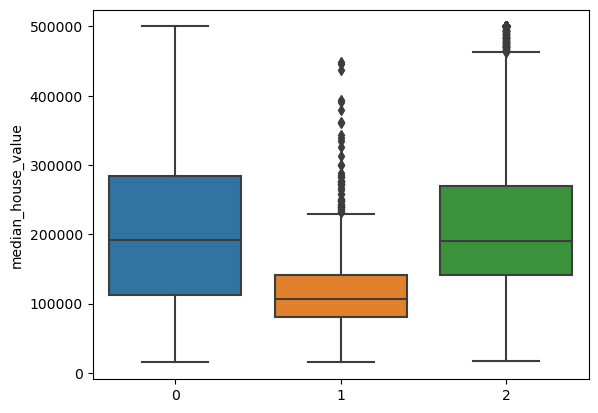

In [9]:
sns.boxplot(x = kmeans.labels_, y = y_train['median_house_value'])

We clearly see that the Northern and Southern clusters have similar distributions of median house values (clusters 0 and 2) that are higher than the prices in the central cluster (cluster 1). 

We can evaluate performance of the clustering algorithm using a Silhouette score which is a part of sklearn.metrics where a lower score represents a better fit.

In [10]:
from sklearn.metrics import silhouette_score

silhouette_score(X_train_norm, kmeans.labels_, metric='euclidean')

0.7499371920917443

Since we have not looked at the strength of different numbers of clusters, we do not know how good of a fit the k = 3 model is. In the next section, we will explore different clusters and compare performance to make a decision on the best hyperparameter values for our model.

## Choosing the best number of clusters

The weakness of k-means clustering is that we don’t know how many clusters we need by just running the model. We need to test ranges of values and make a decision on the best value of k. We typically make a decision using the Elbow method to determine the optimal number of clusters where we are both not overfitting the data with too many clusters, and also not underfitting with too few. 

We create the below loop to test and store different model results so that we can make a decision on the best number of clusters.

In [11]:
K = range(2, 8)
fits = []
score = []


for k in K:
    # train the model for current value of k on training data
    model = KMeans(n_clusters = k, random_state = 0, n_init='auto').fit(X_train_norm)
    
    # append the model to fits
    fits.append(model)
    
    # Append the silhouette score to scores
    score.append(silhouette_score(X_train_norm, model.labels_, metric='euclidean'))

<Axes: xlabel='longitude', ylabel='latitude'>

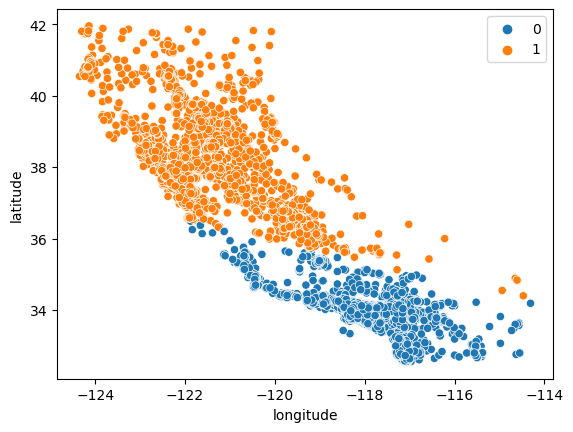

In [12]:
sns.scatterplot(data = X_train, x = 'longitude', y = 'latitude', hue = fits[0].labels_)#k=2

The model does an ok job of splitting the state into two halves, but probably doesn’t capture enough nuance in the California housing market. 

Next, we look at k = 4. 

<Axes: xlabel='longitude', ylabel='latitude'>

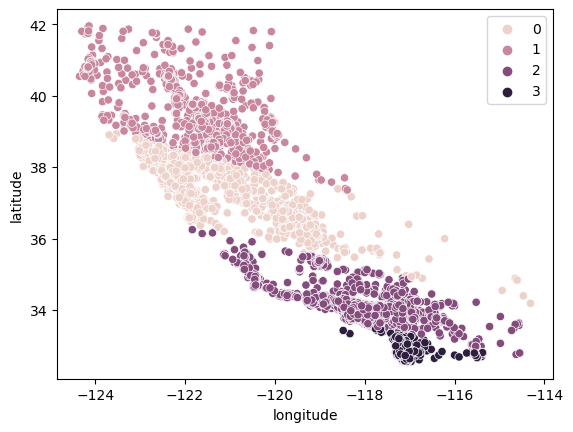

In [13]:
sns.scatterplot(data = X_train, x = 'longitude', y = 'latitude', hue = fits[2].labels_)

We see this plot groups California into more logical clusters across the state based on how far North or South the houses are in the state. This model most likely captures more nuance in the housing market as we move across the state. 

Finally, we look at k = 7.

<Axes: xlabel='longitude', ylabel='latitude'>

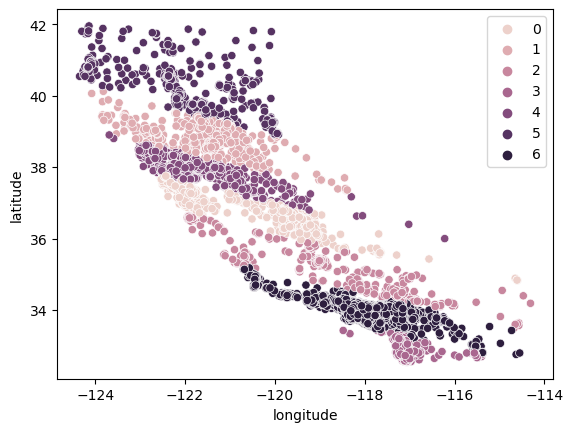

In [14]:
sns.scatterplot(data = X_train, x = 'longitude', y = 'latitude', hue = fits[-1].labels_)

The above graph appears to have too many clusters. We have sacrifice easy interpretation of the clusters for a “more accurate” geo-clustering result. 

Typically, as we increase the value of K, we see improvements in clusters and what they represent until a certain point. We then start to see diminishing returns or even worse performance. We can visually see this to help make a decision on the value of k by using an elbow plot where the y-axis is a measure of goodness of fit and the x-axis is the value of k

<Axes: >

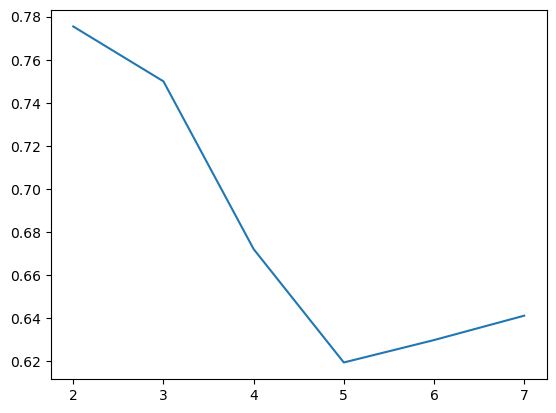

In [15]:
sns.lineplot(x = K, y = score)

We typically choose the point where the improvements in performance start to flatten or get worse. We see k = 5 is probably the best we can do without overfitting. 

We can also see that the clusters do a relatively good job of breaking California into distinct clusters and these clusters map relatively well to different price ranges as seen below. 

<Axes: xlabel='longitude', ylabel='latitude'>

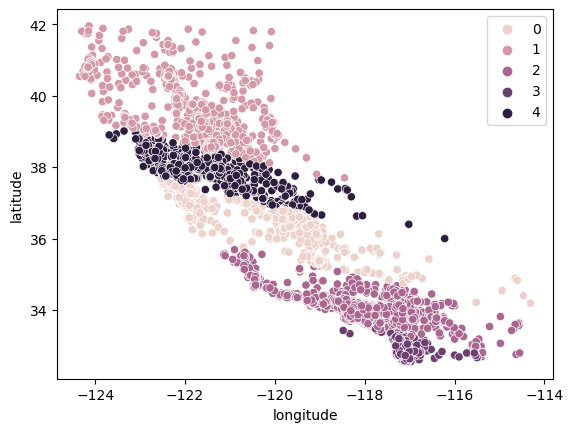

In [16]:
sns.scatterplot(data = X_train, x = 'longitude', y = 'latitude', hue = fits[3].labels_)

<Axes: ylabel='median_house_value'>

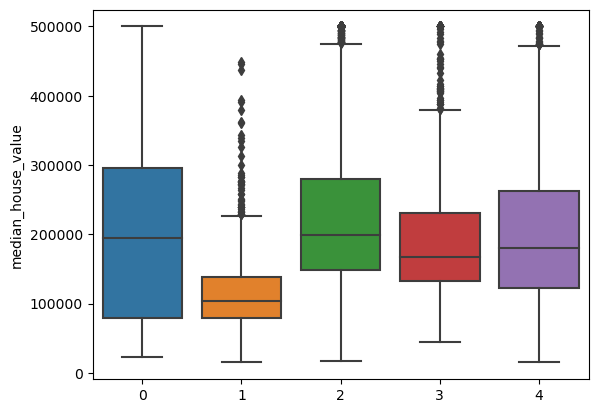

In [17]:
sns.boxplot(x = fits[3].labels_, y = y_train['median_house_value']) 

## When will k-means cluster analysis fail?

K-means clustering performs best on data that are spherical. Spherical data are data that group in space in close proximity to each other either. This can be visualized in 2 or 3 dimensional space more easily. Data that aren’t spherical or should not be spherical do not work well with k-means clustering. For example, k-means clustering would not do well on the below data as we would not be able to find distinct centroids to cluster the two circles or arcs differently, despite them clearly visually being two distinct circles and arcs that should be labeled as such

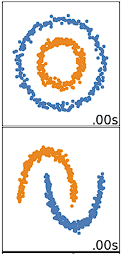

##  K-medoids
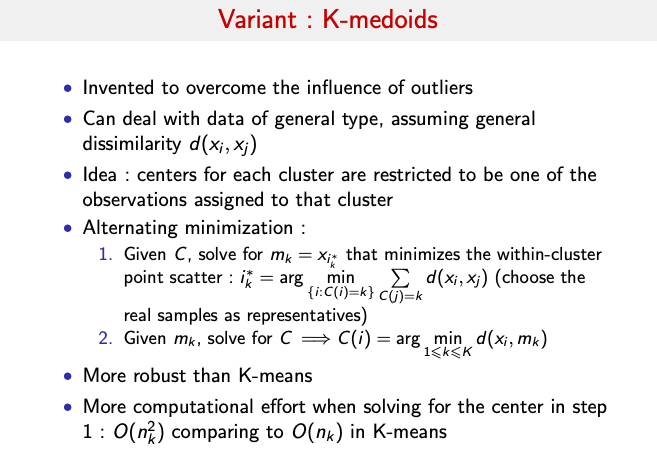


In [18]:
import matplotlib.pyplot as plt
import numpy as np

In [20]:

from sklearn_extra.cluster import KMedoids
from sklearn.datasets import make_blobs


In [21]:
print(__doc__)

Automatically created module for IPython interactive environment


In [22]:

# #############################################################################
# Generate sample data
centers = [[1, 1], [-1, -1], [1, -1]]
X, labels_true = make_blobs(
    n_samples=750, centers=centers, cluster_std=0.4, random_state=0
)

# #############################################################################
# Compute Kmedoids clustering
cobj = KMedoids(n_clusters=3).fit(X)
labels = cobj.labels_

Text(0.5, 1.0, 'KMedoids clustering. Medoids are represented in cyan.')

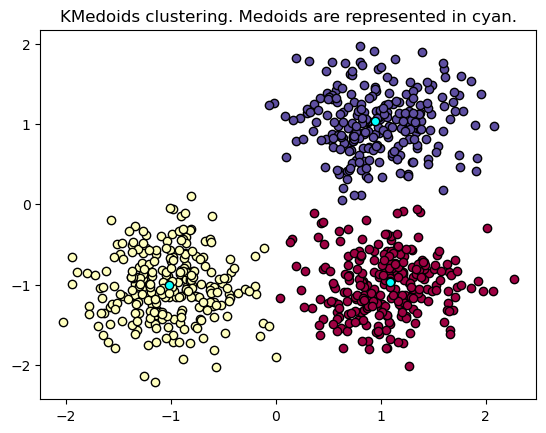

In [23]:
unique_labels = set(labels)
colors = [
    plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))
]
for k, col in zip(unique_labels, colors):
    class_member_mask = labels == k

    xy = X[class_member_mask]
    plt.plot(
        xy[:, 0],
        xy[:, 1],
        "o",
        markerfacecolor=tuple(col),
        markeredgecolor="k",
        markersize=6,
    )

plt.plot(
    cobj.cluster_centers_[:, 0],
    cobj.cluster_centers_[:, 1],
    "o",
    markerfacecolor="cyan",
    markeredgecolor="k",
    markersize=6,
)

plt.title("KMedoids clustering. Medoids are represented in cyan.")